In [1]:
import matplotlib.pyplot as plt

In [2]:
# Define the states and rewards
states = ['A', 'B', 'C', 'D', 'E', 'Home']
rewards = [1, 2, 2, 3, 3]

In [3]:
# Parameters
episodes = 50
gamma = 1.0
alpha = 0.1

In [4]:
# Initialize value estimates
V_mc = {s: 0.0 for s in states}
V_td = {s: 0.0 for s in states}

# Store value history for plotting
history_mc = {s: [] for s in states}
history_td = {s: [] for s in states}

In [ ]:


def mc_first_visit_update(value, return_, alpha):
    """Returns updated value based on full return (Monte Carlo)."""
    return value + alpha * (return_ - value)

def td0_update(value, reward, next_value, alpha, gamma):
    """Returns updated value based on TD(0) rule."""
    target = reward + gamma * next_value
    return value + alpha * (target - value)

In [ ]:
# --- Run Episodes ---
for ep in range(episodes):
    #  Monte Carlo (First-Visit) Updates 
    G = 0
    returns = {}
    for t in reversed(range(len(rewards))):  
        G += rewards[t]
        state = states[t]
        if state not in returns:  # first-visit only
            returns[state] = G

    for state, G in returns.items():
        V_mc[state] = mc_first_visit_update(V_mc[state], G, alpha)

    # TD(0) Updates 
    for t in range(len(rewards)):
        s = states[t]
        s_next = states[t + 1]
        r = rewards[t]
        V_td[s] = td0_update(V_td[s], r, V_td[s_next], alpha, gamma)

    # save for plotting
    for s in states:
        history_mc[s].append(V_mc[s])
        history_td[s].append(V_td[s])


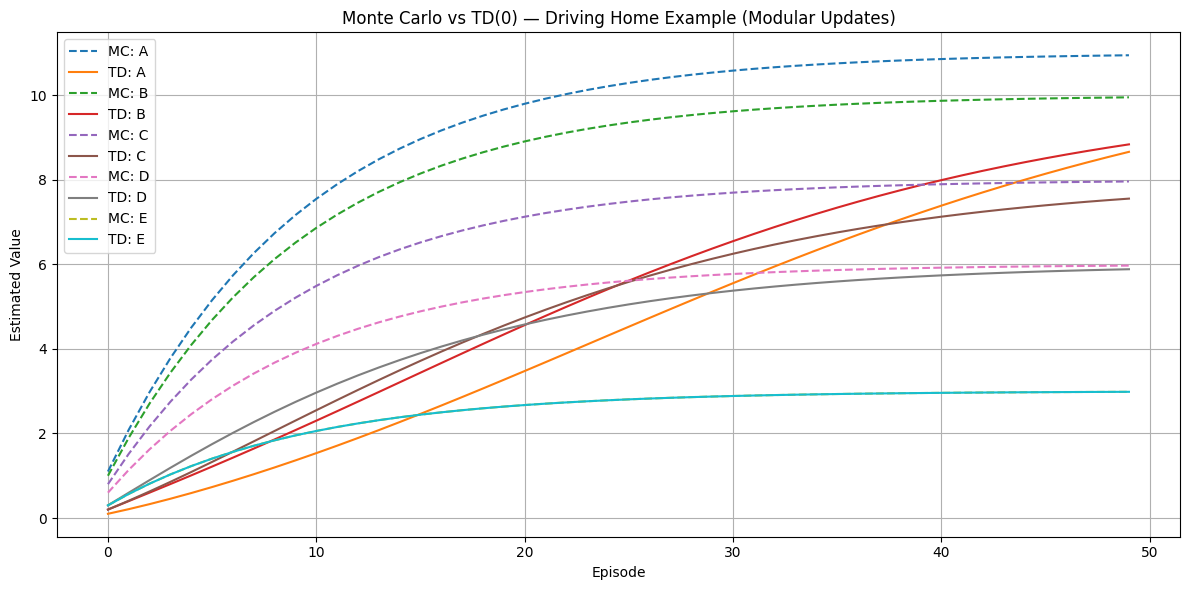

In [ ]:

plt.figure(figsize=(12, 6))
for s in states[:-1]:  # Skip 'Home' (always 0)
    plt.plot(history_mc[s], label=f'MC: {s}', linestyle='--')
    plt.plot(history_td[s], label=f'TD: {s}')
plt.xlabel('Episode')
plt.ylabel('Estimated Value')
plt.title('Monte Carlo vs TD(0) — Driving Home Example (Modular Updates)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()